# Time Series Project

## Problem statement
In this project i would like to explore Time Series Analysis and using models such as ARIMA i will predict the future of the UBS share price (my current employer!)

## Overview
The task is to predict the future of the share price using histroical data, i believe Time Series Analysis to be a great choice for this project. 

The initial plan for this project is as follows:

1) Source the data <br>
2) Explore the data <br>
3) Clean the data <br>
4) Prepare the data for analysis <br>
5) Evaluate the model <br>
5) More time<br>


# Source / Clean / Explore
The data for this project is sourced from Yahoo and is based on the daily share price movements of UBS AG, my current company. 

The data is provided freely and openly at Yahoo.com. The data contains no personally identifying information or sensitive commmercial data. 

In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#%matplotlib inline

from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

First i downloaded the data set from Yahoo.com and saved it within the relevant directory. Yahoo do offer a finance library however this doesnt connect to UBS systems. I will certainly pursue this outside of the office.

In [86]:
df = pd.read_csv('ubs1y.csv')
df.head()

,Date,Open
0,01/11/2018,14.15
1,02/11/2018,14.49
2,05/11/2018,14.27
3,06/11/2018,14.05
4,07/11/2018,14.32


In the above code i filled all NA's with zero, this will help with non trading days such as Bank Holiday. 

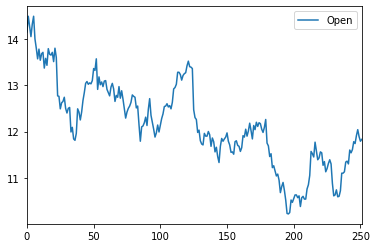

In [87]:
df.plot()

This graph does tell me much, i only want to see the Date and the Open columns. I will delete the others

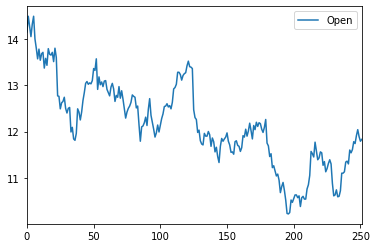

In [88]:
df.plot()

In [89]:
df.dtypes

Date     object
Open    float64
dtype: object

In [90]:
df.isnull().values.any()

False

In [91]:
df.head()

,Date,Open
0,01/11/2018,14.15
1,02/11/2018,14.49
2,05/11/2018,14.27
3,06/11/2018,14.05
4,07/11/2018,14.32


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
Date    252 non-null object
Open    252 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [93]:
df['Date'] = pd.to_datetime(df['Date']) #Change the data-type of the column's entries to datetime. 
df.set_index('Date', inplace = True) #Replace the index of the dataframe df by the dates contained in the first column

#Check datatype of index
df.index

DatetimeIndex(['2018-01-11', '2018-02-11', '2018-05-11', '2018-06-11',
               '2018-07-11', '2018-08-11', '2018-09-11', '2018-12-11',
               '2018-11-13', '2018-11-14',
               ...
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-28', '2019-10-29', '2019-10-30',
               '2019-10-31', '2019-01-11'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [94]:
df['06-2019']

,Open
Date,
2019-06-02,13.04
2019-06-03,12.55
2019-06-05,12.47
2019-06-06,11.79
2019-06-13,11.71
2019-06-14,11.55
2019-06-17,11.56
2019-06-18,11.51
2019-06-19,11.78


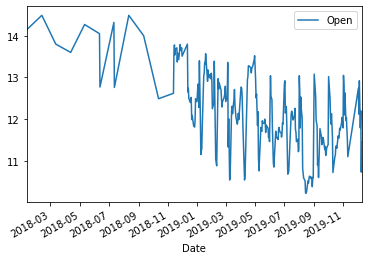

In [95]:
df.plot()

In [96]:
ubs_ts = df['Open']
ubs_ts.head()

Date
2018-01-11    14.15
2018-02-11    14.49
2018-05-11    14.27
2018-06-11    14.05
2018-07-11    14.32
Name: Open, dtype: float64

In [97]:
ubs_ts.describe()

count    252.000000
mean      12.160754
std        0.929083
min       10.220000
25%       11.560000
50%       12.090000
75%       12.782500
max       14.490000
Name: Open, dtype: float64

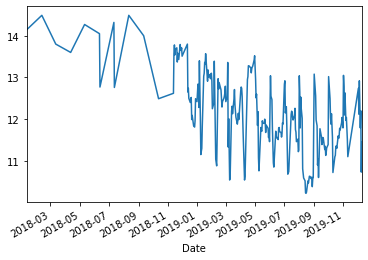

In [98]:
ubs_ts.plot()

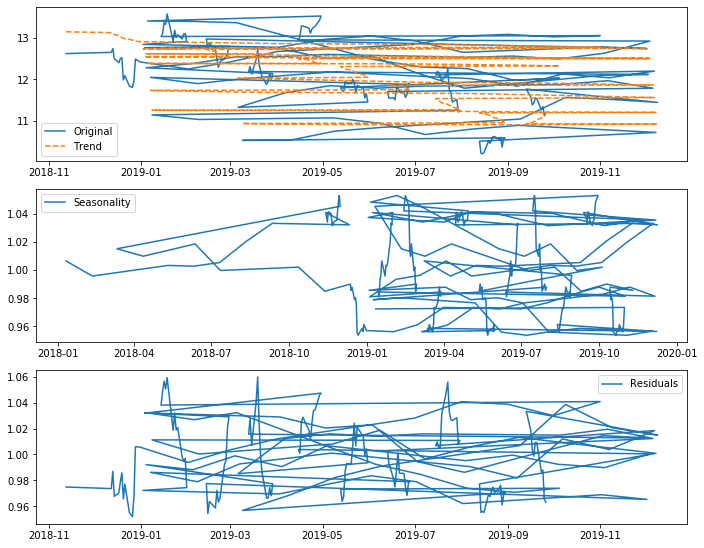

In [103]:
decomposition = seasonal_decompose(ubs_ts, model='multiplicitive', freq=52)
# Model can be chosen to be multiplicative or additive. 
# Since additive is linear it would mean the seasonality/residuals do not increase with
# the trend. However, as can be seen in the original data, as well as it is a common 
# assumption with internet searches, the more people google something the higher the 
# fluctuations will be as well. Therefore we choose 'multiplicative' here. 


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label = 'Original')
plt.plot(trend, label = 'Trend',linestyle='--')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


We can see from this decomposition analysis that the original data is made up of a general underlying trend, a seasonal component that repeats itself for each year (defined by freq=52), and a non-systematic residual component.

In [104]:
from statsmodels.tsa.stattools import kpss
kpss(ubs_ts)

(1.2405109900148654,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

P value at 0.01 so this is less than 0.05. 

In [75]:

ts_log = np.log(ubs_ts)

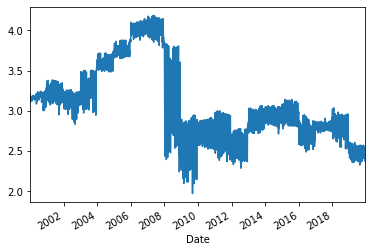

In [76]:
ts_log.plot()

In [77]:
kpss(ts_log.diff().dropna())

(0.10653820996770139,
 0.1,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### ARIMA Model

As with most techniques in data science, there are multiple ways to model different data.

ARIMA is one of the most common ways to model time series data.

ARIMA models are based around the concept that you can predict the next value in a time series by using information about the most recent data points. It also assumes there will be some randomness/noise in your data that is not predictable.

We can find some good parameters for our model using the methods and libraries below.

In [78]:
# This method finds the MSE of a single ARIMA model.
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) # Needs to be an integer because it is later used as an index.
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [79]:

# This method evaluates ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [80]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [81]:
# Finally, we find the best ARIMA model for our data.
# This can take a while to execute.
import warnings
warnings.filterwarnings("ignore")
evaluate_models(ts_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.205
ARIMA(0, 0, 1) MSE=0.054
ARIMA(0, 1, 0) MSE=0.000
ARIMA(0, 1, 1) MSE=0.000
ARIMA(0, 1, 2) MSE=0.000
ARIMA(0, 2, 0) MSE=0.001
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
Best ARIMA(0, 1, 0) MSE=0.000


In [82]:
p=0
d=1
q=0
model = ARIMA(ts_log, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 4897
Model:                 ARIMA(0, 1, 0)   Log Likelihood               11384.533
Method:                           css   S.D. of innovations              0.024
Date:                Wed, 20 Nov 2019   AIC                         -22765.066
Time:                        13:05:15   BIC                         -22752.074
Sample:                             1   HQIC                        -22760.508
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.353      0.724      -0.001       0.001
==============================================================================
"""

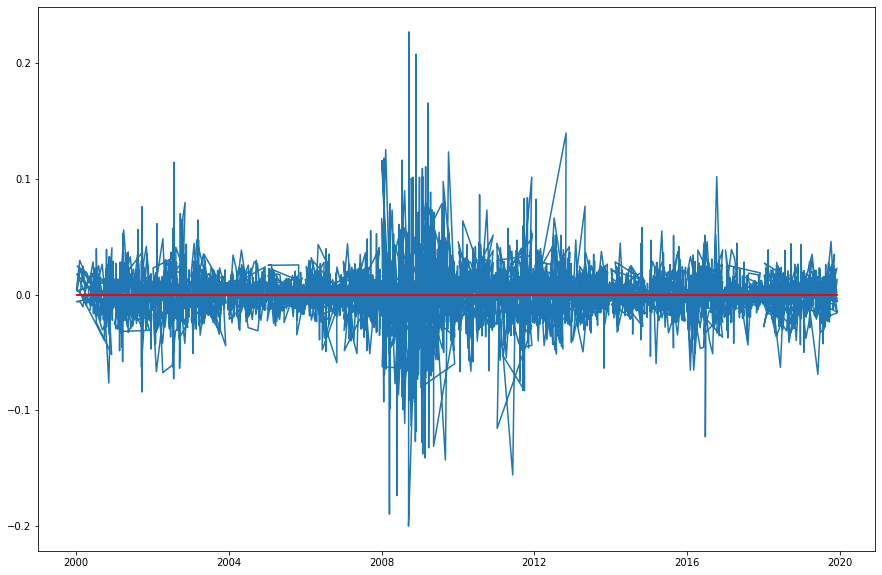

In [84]:
plt.figure(figsize=(15,10))
plt.plot(ts_log.diff())
plt.plot(model_fit.predict(), color = 'red')


4.2. (Partial) Autocorrelation Function
How much is the data correlated with itself?

https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima

Last page of this document explains how to find the p- and q-parameters from the ACF and PACF.
The combination of AR(p) and MA(q) can lead to slight changes in the parameters but this could be done by a gridsearch trying to minimise the AIC.

Akaike Information Critera
We need to find the parameters (p,d,q)

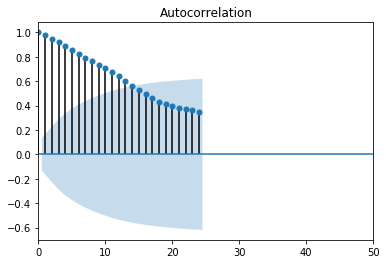

In [191]:
plot_acf(ubs_ts)
plt.xlim(0,50)
plt.show()

The data is non-stationary. We need to apply first order differencing.



This makes the data stationairy, i.e., we remove the trend.
This information will be important when we define our model.

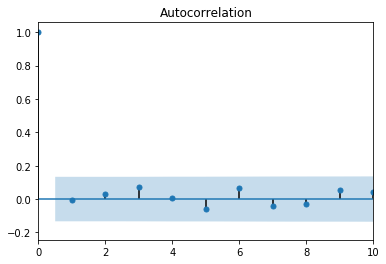

In [192]:
plot_acf(ubs_ts.diff(1).dropna())
plt.xlim(0,10)
plt.show()

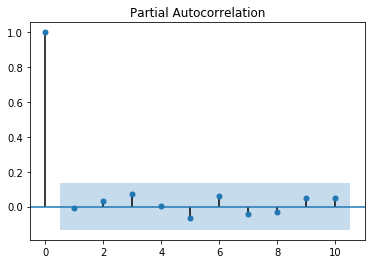

In [193]:
plot_pacf(ubs_ts.diff(1).dropna(), lags=10)
plt.show()

In [259]:
resDiff = sm.tsa.arma_order_select_ic(ubs_ts, max_ar=3, max_ma=3, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (1, 0) is the best.


In [308]:

train = ubs_ts[:'06-2019'].dropna()
test = ubs_ts['28-05-2019':].dropna()

In [314]:

model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,0,52) # We gridsearched the seasonal parameters
              ,enforce_stationarity=False, enforce_invertibility=False)

In [315]:
results = model.fit()

In [324]:
pred = results.predict(start='28-05-2019',end='2019-11-08')[1:]

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

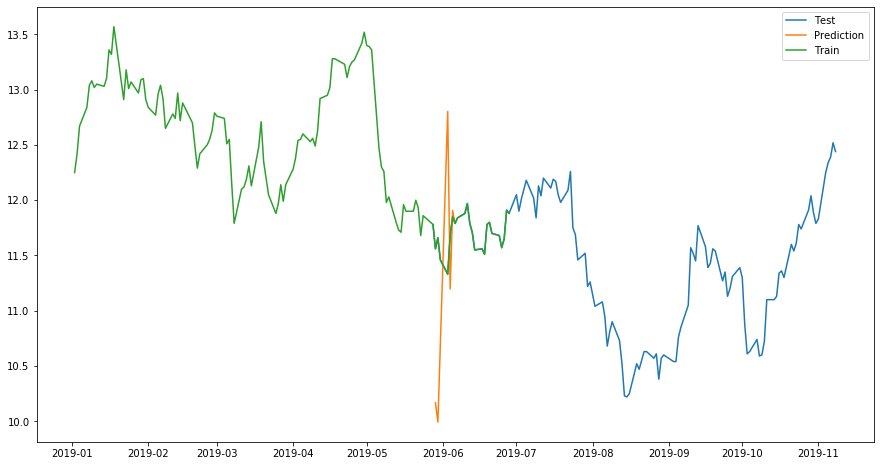

In [317]:
plt.figure(figsize=(15,8))
plt.plot(test,label='Test')
plt.plot(pred,label='Prediction')
plt.plot(train,label='Train')
plt.legend(loc='best')
plt.show()

In [242]:
start_index = '2019-06-06'
end_index = '2019-09-09'
forecast = results.predict(start=start_index, end=end_index)

ValueError: Prediction must have `end` after `start`.

TypeError: float() argument must be a string or a number, not 'PredictionResultsWrapper'

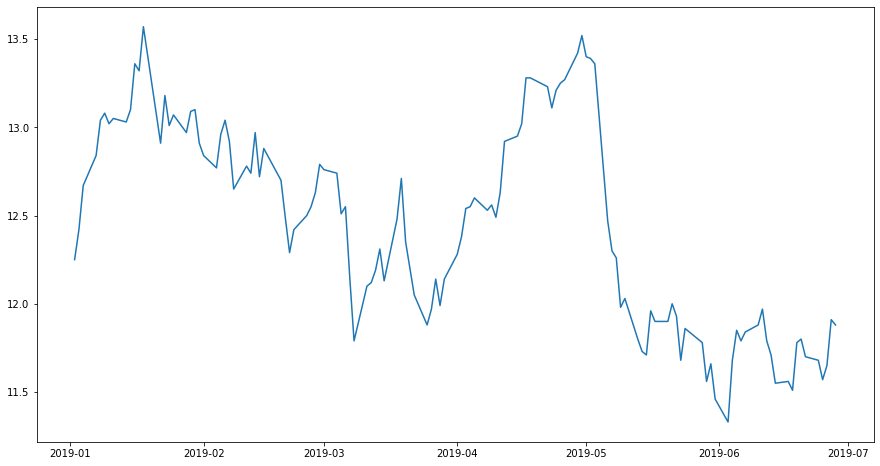

In [223]:
plt.figure(figsize=(15,8))
plt.plot(test,label='Test')
plt.plot(pred,label='Prediction')
plt.plot(train,label='Train')
plt.legend(loc='best')
plt.show()

In [132]:
pred = results.predict(start='06-2018',end='08-2019')[1:]

ValueError: Prediction must have `end` after `start`.

After researching the subject of Time Series Analysis online, majority of sources say the first thing to test is the correlation of your data. Better results can be obtained with data that is some what correlated. 

Text(0.5, 1.0, 'UBS Correlation Plot')

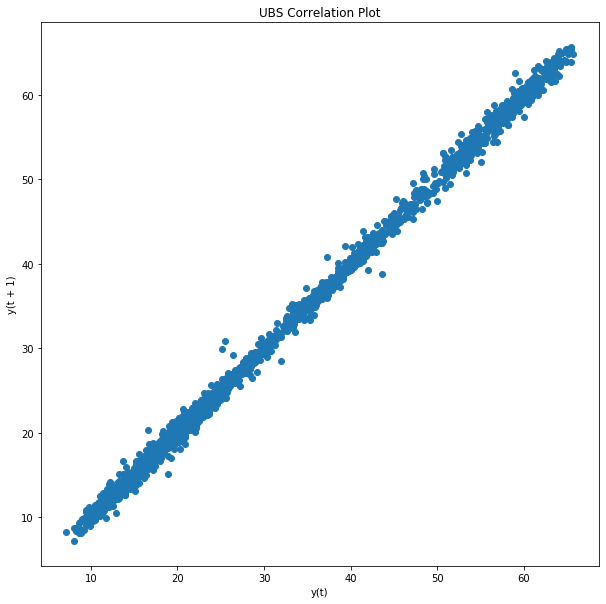

In [5]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=1)
plt.title('UBS Correlation Plot')

The above graph is using a lag of 1. This tests the correlation on the prevoius observation or in this example, the previous days stock price. 

I then checked how the correlation looked over larger time horizons. See below

Text(0.5, 1.0, 'UBS Correlation Plot 10')

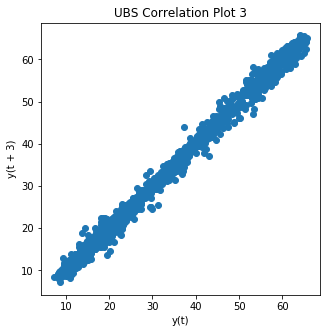

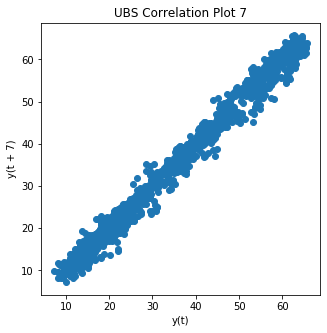

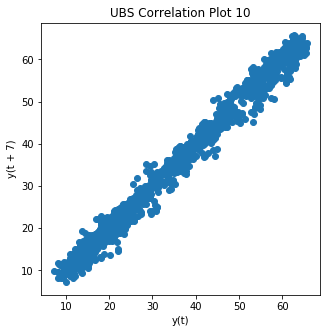

In [90]:
plt.figure(figsize=(5,5))
lag_plot(df['Open'], lag=3)
plt.title('UBS Correlation Plot 3')
plt.figure(figsize=(5,5))
lag_plot(df['Open'], lag=7)
plt.title('UBS Correlation Plot 7')
plt.figure(figsize=(5,5))
lag_plot(df['Open'], lag=7)
plt.title('UBS Correlation Plot 10')

Corelation is very strong, but slightly stronger when only using 1 day lag.

## Build the Model

First i need to split the data into training and a test set, i can then graph to see what the time series will look like.

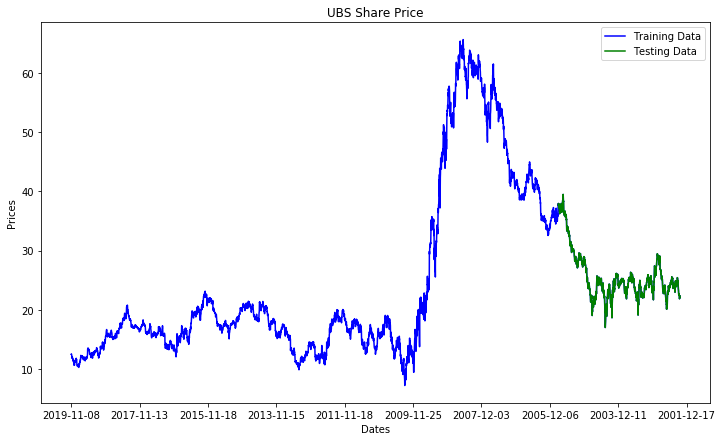

In [16]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('UBS Share Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,5000, 550), df['Date'][0:5000:500])
plt.legend()

Now i will evaluate the model using Mean Squared Error and Symmetrix Mean Absolute Percentage Error (SMAPE).

I found a function online to help with this issue as its not currently supported in SKLEAN.

In [14]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

Now i can create the Arima model to be used in the live implementation. ARIMA stands for Autoregressive integrated moving average model. It has 3 main parameters as follows:- <BR>
p: The number of lag observations included in the model, also called the lag order. <BR>
d: The number of times that the raw observations are differenced, also called the degree of differencing.<BR>
q: The size of the moving average window, also called the order of moving average.    <BR>

First i will try p=6, d=1 and q=0

In [17]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.210
Symmetric mean absolute percentage error: 15.700


The smaller the means squared error the closer i am to finding the line of best fit. In the above my MSE is very low at 0.06. This shows the model has smaller magnitude of errors. 

Now i can plot the training, test and predicted prices against time to visualize how did the model performed against the actual prices.

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('UBS Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,5000, 500), df['Date'][0:5000:500])
plt.legend()

I would like a closer look at the test data. I can do this by zooming in (orange and green section above). 

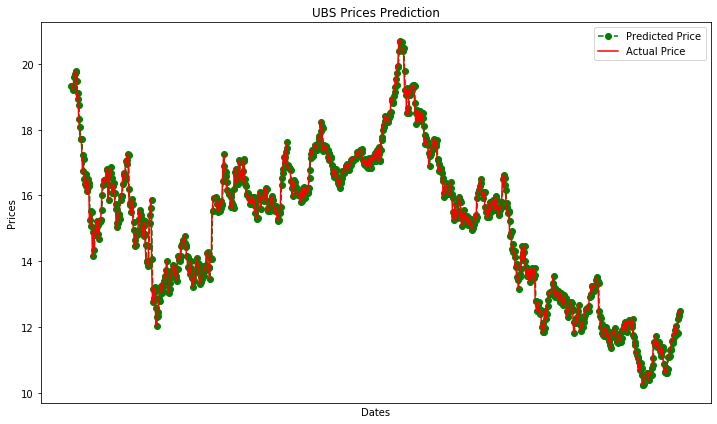

In [84]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.legend()
plt.title('UBS Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(5000,5000, 500), df['Date'][5000:5000:500])
plt.legend()

This analysis using ARIMA lead overall to appreciable results.  If i had more time to explore the data i would try some more regression type models, i could bring in further attributes such as trading volume in hope to increase accuracy. I could also add some text analysis to see if the price reacted to certain text phrases mentioned on that day in the news. 